In [2]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import ast
from scipy import sparse

In [3]:
from IPython.display import SVG
from sknetwork.embedding.force_atlas import ForceAtlas
from sknetwork.visualization import svg_graph

In [26]:
data = pd.read_csv('benedictquinn_501_music.csv')
data = data
data.reset_index(level=0, inplace=True)

In [44]:
data

,index,user_name,nickname,signature,verified,follower_count,following_count,likes_count,video_count,last_active,only_mentions,only_duos,collabs,collabs_url,hashtags,instrument,style,music_collabs_url
0,0,benedictquinn,Ben Quinn,oh hey!\r\nguitarist and producer \r\ngo follo...,False,803,135,4962,69,2021-11-03,['jasmineoakleymusic'],[],['jasmineoakleymusic'],{'jasmineoakleymusic': 'https://v16-webapp.tik...,"['asktiktok', 'music', 'instrumental', 'chill'...","['guitar', 'bass', 'synth', 'chords']","['rnb', 'hiphop', 'indie', 'groove', 'neosoul'...",{'jasmineoakleymusic': ['{'pastelmusique': 'ht...
1,1,jasmineoakleymusic,Jasmine Oakley,Singer/Artist ✨,False,5536,58,65200,54,2022-01-02,"['pastelmusique', 'benedictquinn', 'thatdapper...",['rubenwan'],"['pastelmusique', 'benedictquinn', 'thatdapper...",{'pastelmusique': 'https://v16-webapp.tiktok.c...,"['beats', 'rnb', 'singer', 'vocalist', 'riffs'...","['guitar', 'bass', 'piano', 'drums']","['jazz', 'rap', 'rnb', 'neosoul', 'gospel']",{'pastelmusique': ['{'bomelmusic': 'https://v1...
2,2,pastelmusique,Ｐａｓｔｅｌ,FOLLOW ME ON IG ✨\r\nＰａｓｔｅｌ,False,1058,81,4624,73,2022-01-02,"['bomelmusic', 'katpenkin', 'jasmineoakleymusi...",[],"['bomelmusic', 'katpenkin', 'jasmineoakleymusi...",{'bomelmusic': 'https://v16-webapp.tiktok.com/...,"['tiktokmusique', 'groovy', 'funktiktok', 'mus...",[],['indiemusic'],{'katpenkin': ['{'aminahumphreys': 'https://v1...
3,3,thatdappermusician,Myron Evans,Keys mainly🎹among other things,False,678,445,5990,57,2021-12-10,"['tiktok', 'andpacker', 'maha_yrysbekova', 'al...","['rjthecomposer', 'jeremyolenski', 'proffluteb...","['tiktok', 'rjthecomposer', 'jeremyolenski', '...",{'tiktok': 'https://v16-webapp.tiktok.com/af18...,"['christmas', 'piano', 'jazz', 'ewf', 'septemb...","['piano', 'chords']","['jazz', 'pop']",{'profflutebae': ['{'danfabervocalstudio': 'ht...
4,4,katpenkin,katpenkin,I make music and think I’m funny 🤗 \r\n\r\nLOV...,False,3163,448,124200,51,2021-12-29,"['aminahumphreys', 'str3lly2.0']",[],"['aminahumphreys', 'str3lly2.0']",{'aminahumphreys': 'https://v16-webapp.tiktok....,"['fyp', 'foryou', 'foryoupage', 'mybrawlsuper'...",[],[],{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,carrtoons,CARRTOONS,Bassist / Producer,False,3794,121,16100,11,2021-12-04,"['thekount', 'conor_albert']",[],"['thekount', 'conor_albert']",{'thekount': 'https://v16-webapp.tiktok.com/4f...,"['beats', 'producer', 'hiphop', 'soul', 'bass'...","['guitar', 'bass', 'drums']","['funk', 'hiphop']",{'thekount': ['{'carrtoons': 'https://v16-weba...
101,101,mrflamingosis,Flamingosis,New single Daymaker is now out \r\n\r\nhttps:/...,False,1124,18,3156,17,2022-01-01,[],[],[],{},"['flamingosis', 'fyp', 'dancing', 'footwork', ...",[],"['hiphop', 'lofi']",{}
102,102,collegemusic,College Music,🚨 👇 🚨,True,409,6,836,19,2021-11-05,"['saitbeats', 'stanlodge', 'barneydwyer']",[],"['saitbeats', 'stanlodge', 'barneydwyer']",{'saitbeats': 'https://v16-webapp.tiktok.com/e...,"['lofihiphop', 'lofi', 'chillhop', 'beats', 'f...",[],"['jazz', 'indie', 'lofi', 'blues']",{'stanlodge': ['{'sza': 'https://v16-webapp.ti...
103,103,elizaisdunn,eliza,I draw mcyt guys 😵‍💫\r\n18 / ♀/ “cottagecore m...,False,11100,199,369600,79,2021-12-30,[],[],[],{},"['boatem', 'hermitcraft', 'hermitcraftseason8'...",[],[],{}


In [27]:
def convert_to_adjacency(data):
    L = []
    for i in range(len(data)):
        l = []
        for cand in (ast.literal_eval(data.collabs[i])):
            if cand in list(data.user_name):
                l.append(int(data[data['user_name'] == cand]['index']))
        L.append(l)
    return L

In [97]:
def convert_to_matrix(graph):
    matrix = []
    for i in range(len(graph)): 
        matrix.append([0]*len(graph))
        for j in graph[i]:
            matrix[i][j] = 1
    return matrix

In [98]:
adjacency = convert_to_matrix(convert_to_adjacency(data))
adjacency = sparse.csr_matrix(adjacency)
image = svg_graph(adjacency)
#SVG(image)

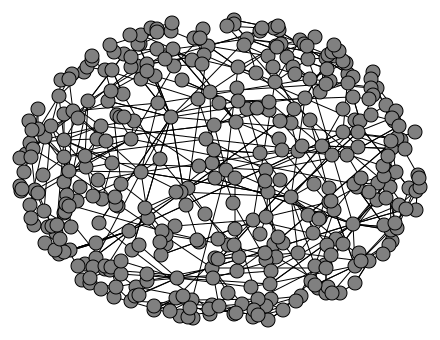

In [99]:
forceatlas2 = ForceAtlas()
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding)
SVG(image)

In [100]:
weight = [len(li) for li in convert_to_adjacency(data)]
data['poids'] = weight

In [101]:
style = ['jazz', 'funk', 'rock', 'pop', 'rap', 'metal', 'rnb', 'hiphop', 'indie',
         'groove', 'classical', 'neosoul', 'indiemusic',
         'blues', 'punk', 'folk', 'gospel', 'dubstep', 'house', 'electro']
         
instrument =['guitar', 'bass', 'piano', 'drums',
              'tuba', 'chords', 'saxophone', 'violin', 'flute', 'cello']

vocalist = ['sing', 'singer', 'singingchallenge']

res_style = np.zeros(21)
res_instru = np.zeros(21)

for i in range(len(data)):
    L_style = np.array([int(any(m in w for w in ast.literal_eval(data.hashtags[i]))) for m in style])
    L_instru = np.array([int(any(m in w for w in ast.literal_eval(data.hashtags[i]))) for m in instrument])

    res_style = [int(x + y) for x, y in zip(res_style, L_style)]
    res_instru = [int(x + y) for x, y in zip(res_instru, L_instru)]

style_count = dict.fromkeys(style)
for i,sty in enumerate(style_count.keys()):
    style_count[sty] = res_style[i]
style_count = dict(sorted(style_count.items(), key=lambda item: item[1]))

instru_count = dict.fromkeys(instrument)
for i,inst in enumerate(instru_count.keys()):
    instru_count[inst] = res_instru[i]
instru_count = dict(sorted(instru_count.items(), key=lambda item: item[1]))

tab_style = []
tab_instrument = []

for i in range(len(data)):
    
    style_bool = np.array([any(m in w for w in ast.literal_eval(data.hashtags[i])) for m in style])
    tab_s = [i for i, x in enumerate(style_bool) if x]
    if tab_s != []:
        tab_style.append(min(tab_s))
    else:
        tab_style.append(None)
    
    instrument_bool = np.array([any(m in w for w in ast.literal_eval(data.hashtags[i])) for m in instrument])
    tab_i = [i for i, x in enumerate(instrument_bool) if x]
    if tab_i != []:
        tab_instrument.append(min(tab_i))
    else:
        tab_instrument.append(None)

In [138]:
data['instrument'] = tab_instrument
data['instrument'] = data['instrument'].astype('Int64')
data['style'] = tab_style
data['style'] = data['style'].astype('Int64')

In [163]:
nodes = data[['index', 'user_name', 'poids', 'style', 'instrument']]
nodes = nodes.rename(columns={'index': 'Id'})
nodes = nodes.rename(columns={'user_name': 'Label'})
nodes

,Id,Label,poids,style,instrument
0,0,kissamile,1,0,0
1,1,conor_albert,2,0,0
2,2,themaxpope,1,<NA>,0
3,3,jamessmithvocal,2,<NA>,<NA>
4,4,lilyagnesmusic,2,0,0
...,...,...,...,...,...
365,365,souperfruit,1,<NA>,<NA>
366,366,idlemindnv,0,5,0
367,367,ryandanielmusic,0,4,<NA>
368,368,justin_jen_,0,2,0


In [164]:
edges = pd.DataFrame(columns = ['Source', 'Target', 'Type'])

L = convert_to_adjacency(data)

for i, collab in enumerate(L):
    if collab != []:
        for c in collab:
            series = pd.Series([i, c, 'undirected'], index = edges.columns)
            '''
            if i in L[c]:
                L[c].remove(i)
            '''
            edges = edges.append(series, ignore_index=True)
            
edges

,Source,Target,Type
0,0,1,undirected
1,1,2,undirected
2,1,3,undirected
3,2,1,undirected
4,3,1,undirected
...,...,...,...
573,361,350,undirected
574,361,247,undirected
575,362,350,undirected
576,363,243,undirected


In [165]:
nodes.to_csv('nodes_gephi.csv', index=False)
edges.to_csv('edges_gephi.csv', index=False)